In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import random

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

# Aprendizagem de Máquina I - 2022/02

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `3n5aigg`

# Projeto 1

Este notebook é correspondente ao nosso primeiro projeto, passado no dia 13/09/2022 e para entrega no dia 05/10/2022 (passível de negociação). Ele consiste em questões teóricas e questões práticas. A entrega da atividade deve ser feita através do Google Classroom, fazendo um upload deste notebook, devidamente atualizado com as suas resoluções e implementações. Recomendo fortemente que façam o trabalho no Google Colab, pois assim temos certa garantia de estarmos rodando tudo no mesmo ambiente, e eu conseguir executar o código de vocês sem dificuldades (o uso de um *docker* ficará para outra edição do curso! Ainda estou aprendendo a usar certas tecnologias!)


A resolução das questões teóricas pode ser feita de duas formas:
* Escrita em $\LaTeX$ aqui no próprio Google Colab
* Escrita à mão, escaneada de modo legível, e feito o upload no Google Classroom.

A primeira alternativa é mais recomendada, por deixar o trabalho mais organizado, e cá entre nós, estar tudo em um documento só me facilita a correção! :-) mas para quem não tem fluência com $\LaTeX$ ou prefere fazer à mão, a segunda alternativa está aí. Obviamente que não haverá punição nenhuma meramente por conta da escolha de sua preferência.

## Parte teórica

### Questão T1

Na aula do dia 08/09 nós encontramos a solução analítica do problema de regressão linear através da minimização da seguinte função, em relação à variável $\boldsymbol{\beta}$: $$\|\mathbb{X}\boldsymbol{\beta} - \mathbf{y}\|^2,$$
onde $\mathbb{X}$ é uma matriz de tamanho $n \times p$ contendo os atributos observados ($n$ é a quantidade de observações e $p$ é a quantidade de atributos do modelo), $\boldsymbol{\beta}$ é um vetor de tamanho $p \times 1$ contendo os coeficientes da regressão e $\mathbf{y}$ é um vetor de tamanho $n \times 1$ contendo as respostas observadas. Para simplificar, note que **não** estamos levando em conta o intercepto no problema de regressão, de modo que **todas** as colunas de $\mathbb{X}$ representam atributos observados. Em particular, a primeira coluna da matriz $\mathbb{X}$ **não** é necessariamente preenchida com $1$'s.

O objetivo dessa questão é estudar o que acontece com a solução analítica do Lasso e da regressão Ridge. Para simplificar, assuma que a matriz $\mathbb{X}$ têm colunas ortonormais, de modo que $\mathbb{X}^T\mathbb{X} = \mathbb{I}_p$, onde $\mathbb{I}_p$ é a matriz identidade de tamanho $p \times p$. Com base nisso, faça o que se pede abaixo.

*   a) Encontre a solução analítica da regressão Ridge, minimizando em relação à variável $\boldsymbol{\beta}$ a função: $$\|\mathbb{X}\boldsymbol{\beta} - \mathbf{y}\|^2 + \lambda\|\boldsymbol{\beta}\|_2^2.$$ A mesma estratégia que fizemos em sala para a regressão sem penalização funciona aqui. Note que como não estamos considerando o intercepto na regressão, **todas** as entradas de $\boldsymbol{\beta}$ são penalizadas.

$$\|\mathbb{X}\boldsymbol{\beta} - \mathbf{y}\|^2 + \lambda\|\boldsymbol{\beta}\|_2^2  $$

Podemos abrir em:<br>

$$    (X \beta - y)^{T} . (X \beta - y) + \lambda \beta^{T} \beta  $$

$$ = $$

$$ (X \beta)^{T} X \beta - (X \beta)^{T} y - y^{T} X \beta + y^{T}y + \lambda \beta^{T} \beta $$

<br>

Temos que o produto de matrizes $ y^{T} X \beta $, resulta em um número. Logo, temos que $ y^{T} X \beta = (y^{T} X \beta)^{T} = (X \beta)^{T} y  $

<br>

Podemos simplificar o termo $ (X \beta)^{T} X\beta $, usando a informação de que $ X^{T} X = \mathbb{I}_p $.

<br>

$$ (X \beta)^{T} X\beta = \beta^{T}X^{T}X\beta = \beta^{T} \beta $$

<br>

Dessa forma temos: <br>

$$ \beta^{T} \beta - 2 y^{T} X \beta + y^{T}y + \lambda \beta^{T} \beta  $$

<br>

Para acharmos o $ \beta $ que minimiza a equação acima, precisamos derivar termo a termo e igualar a zero.

$$ \frac{\partial ( \beta^{T} \beta )}{\partial \beta} - \frac{\partial (2 y^{T} X \beta) }{\partial \beta} + \frac{\partial(y^{T}y)}{\partial \beta} + \frac{\partial ( \lambda \beta^{T} \beta) }{\partial \beta} = 0 $$

<br>

$$ 2 \beta - 2y^{T}X + 0 + 2 \lambda \beta = 0 $$

<br>

$$  ( 1 + \lambda \mathbb{I}  ) \beta = y^{T} X $$

<br>

Temos que a solução analítica da regressão de Ridge é dada por:

<br>

$$ \beta = ( 1 + \lambda)^{-1} y^{T}X  $$

*   b) Encontre a solução analítica da regressão Lasso, minimizando em relação à variável $\boldsymbol{\beta}$ a função: $$\|\mathbb{X}\boldsymbol{\beta} - \mathbf{y}\|^2 + \lambda\|\boldsymbol{\beta}\|_1.$$ Note que como a penalização não é uma função derivável, o procedimento usado no item a) pode não funcionar, de modo que outra alternativa deve ser buscada.

$$    (X \beta - y)^{T} . (X \beta - y) + \lambda |\beta|   $$

$$ = $$

$$ (X \beta)^{T} X \beta - (X \beta)^{T} y - y^{T} X \beta + y^{T}y + \lambda |\beta| $$

<br>

Temos que o produto de matrizes $ y^{T} X \beta $, resulta em um número. Logo, temos que $ y^{T} X \beta = (y^{T} X \beta)^{T} = (X \beta)^{T} y  $

<br>

Podemos simplificar o termo $ (X \beta)^{T} X\beta $, usando a informação de que $ X^{T} X = \mathbb{I}_p $.

<br>

$$ (X \beta)^{T} X\beta = \beta^{T}X^{T}X\beta = \beta^{T} \beta $$

<br>

Também iremos ignorar o termo $ y^{T}y$, pois ele não depende de $\beta$

<br>

Dessa forma temos: <br>

$$ \beta^{T} \beta - 2 y^{T} X \beta + \lambda |\beta|  $$

<br>

Sabemos que $y^{T}X = (X^{T}y)^{T} = (\beta^{LS})^{T} $

<br>

$$ (-2\beta^{LS})^{T}\beta + \beta^{T} \beta  + \lambda |\beta| = \sum_{i = 1}^{p}  (-2\beta_i^{LS})^{T}\beta_i + \beta_i^{T} \beta_i  + \lambda |\beta_i|$$

<br>

Temos que $ \forall i \in 	\left \{1, ..., p  \right \} $:

$$ \frac{\partial (-2\beta_i^{LS})^{T}\beta_i }{\partial \beta_i} + \frac{\partial \beta_i^{T} \beta_i  }{\partial \beta_i} + \frac{\partial \lambda |\beta_i|}{\partial \beta_i}  = 0 $$

<br>

$$ -2\beta_i^{LS} + 2 \beta_i + \lambda \cdot sign(\beta_i) = 0 $$

$$  \beta_i  = \beta_i^{LS} - \frac{\lambda}{2} \cdot sign(\beta_i)    $$

<br>

Analisando os sinais de $\beta_i$ em relação ao termo $\frac{\lambda}{2}$ que está lhe multiplicando, temos que:

$$ \beta_i^{Lasso} = \left \{ \begin{matrix} \beta_i^{LS} - \frac{\lambda}{2}, & \mbox{se }\beta_i > \frac{\lambda}{2} \\ \beta_i^{LS} + \frac{\lambda}{2}, & \mbox{se } \beta_i < - \frac{ \lambda}{2} \end{matrix} \right. $$


*   c) À luz do que foi reportado nos itens anteriores, compare as soluções analíticas da regressão linear sem penalização, com penalização Ridge e com penalização lasso. Seguindo o que [AME] reporta na Seção 3.4, faça um estudo da variância de cada um desses estimadores.

Vamos comparar tanto a solução analítica de Lasso, quanto a de Ridge e as duas em função da solução analítica do estimador de mínimos quadrados

<br>

$$ \beta^{Ridge} = \frac{\beta_{LS}^{T}}{(1 + \lambda)} $$

Se aplicarmos a variância dos dois lados da equação, temos:

<br>

$$ V(\beta^{Ridge}) = \frac{V(\beta_{LS})}{(1 + \lambda)^{2}} $$

<br>


Temos que na regressão Ridge, a Variância é menor do que na regressão linar que estima via mínimos quadrados sem penalização, porém seu viés será maior. Por causa do Balanço entre viés e variância

O $\lambda$ vai ser o parâmetro para controlar o balanço entre viés e variância

*   d) Estude o *help* das funções `LinearRegression`, `Lasso`, `Ridge` e `ElasticNet` no `scikit-learn` e reporte que problemas de otimização eles resolvem. Eles são idênticos aos que você resolveu aqui na teoria ou são diferentes? Caso sejam diferentes, tente justificar a diferença observada.

Todas as funções são métodos diferentes para minimizar os coeficientes $\beta$ que serão usados nas nossas variáveis explicativas, para conseguirmos prever nossa variável de resposta.

**LinearRegression**: Minimiza a soma de quadrados $ ||y - X\beta||^{2} $

Não encontrei fórmula matemática no scikitlearn, mas a documentação da função tem o mesmo objetivo da LinearRegression que estudamos na teoria. Encontrar os coeficientes que minimizem as somas residuais da diferença entre a variável de resposta para a predição.

**Lasso**

A fórmula desse modelo no help do scikitlearn é: $\min_{\beta} { \frac{1}{2n_{\text{samples}}} ||X \beta - y||_2 ^ 2 + \lambda ||\beta||_1} $

**Ridge**

A fórmula desse modelo no help do scikitlearn é: $ \min_{\beta} || X \beta - y||_2^2 + \lambda ||\beta||_2^2 $

<br>

**ElasticNet:**

<br>
É uma mistura das penalizações que tem no Lasso e nas penalizações que tem em Ridge

$\rho$ é a l1_ratio

<br>

A fórmula desse modelo no help do scikitlearn é: $\min_{\beta} { \frac{1}{2n_{\text{samples}}} ||X \beta - y||_2 ^ 2 + \lambda \rho ||\beta||_1 +
\frac{\lambda(1-\rho)}{2} ||\beta||_2 ^ 2} $



<br>
<br>

Diferenças da teoria para as funções do scikitlearn:

As diferenças encontradas da teoria para o help do scikitlearn são alguma mudanças pequenas na fórmula como a fração $\frac{1}{2n_{\text{samples}}} $ presente no ElasticNet e no Lasso. Acredito que essa diferença na parte prática foi feita para controlar o valor dos coeficientes em $\beta$ para não termos problemas com truncamentos no computador e valores com uma ordem de grandeza discrepante

### Questão T2

O objetivo dessa questão é estudar um pouco da *Maldição da Dimensionalidade* (https://en.wikipedia.org/wiki/Curse_of_dimensionality). De modo mais concreto, queremos estudar a seguinte afirmação, de ordem um pouco esotética:

*À medida que $p$ cresce, o volume do hipercubo $\mathbb{H}^p = [0, 1]^p$ fica cada vez mais concentrado em sua "casca" do que em seu interior.*

Para isso, faça o que se pede abaixo.



*    a) Apesar de esotérica, fazer a prova de tal afirmação é bastante simples! Seja $\mathbb{H}^p_{\varepsilon}$ o hipercubo contido em $\mathbb{H}^p$ obtido removendo-se uma "gordurinha" de tamanho $\varepsilon$ de sua beirada, ou seja, $\mathbb{H}^p_{\varepsilon} = [\varepsilon/2, 1 - \varepsilon/2]^p$. Mostre que o volume de $\mathbb{H}^p_{\varepsilon}$ converge para zero, para todo $\varepsilon > 0$, quando $p \to \infty$.

Temos que o volume do Hipercubo $\mathbb{H}^p_{\varepsilon} = [\varepsilon/2, 1 - \varepsilon/2]^p$ é:

<br>

$ vol(\mathbb{H}^p_{\varepsilon} ) = ( 1 - \frac{\epsilon}{2} - \frac{\epsilon}{2} )^{p} = (1 - \epsilon)^{p} $, como o $ \epsilon $ é obtido retirando uma parte de sua beirada,

<br>

temos que: $ 0 < \epsilon < 1 $

<br>

Dessa forma, temos também que: $ 0 < 1 - \epsilon < 1 $

<br>

$$ (1-\epsilon)^{p} = e^{p ln(1- \epsilon)} $$

<br>

$$ \lim_{p \rightarrow \infty} (1-\epsilon)^{p}  = \lim_{p \rightarrow \infty} e^{p \cdot ln(1- \epsilon)} $$

<br>

Como temos $ 1 - \epsilon < 1 $.

<br>

O $ln(1-\epsilon)$ é negativo. Dessa forma o

<br>

$$ lim_{p \rightarrow \infty} e^{p \cdot ln(1- \epsilon)} = 0 $$

*    b) Particularmente, para mim essa demonstação não me ajuda a ter nenhuma intuição sobre o resultado, e ele continua sendo esotérico! Porém, um dia, ouvindo música, tive uma revelação divina que cá partilho com vocês. Fixe algum valor de $0 < \varepsilon < 1$ à sua escolha e simule $n$ vetores de tamanho $p$ de observações de uma variável aleatória uniforme no intervalo $[0, 1]$. Qual é a proporção desses vetores que não têm nenhuma observação fora do hipercubo $\mathbb{H}^p_{\varepsilon}$? Faça uma explicação, baseada em tal experimento, para justificar empiricamente o resultado que você provou no item a).

### Vamos fazer tal experimento:


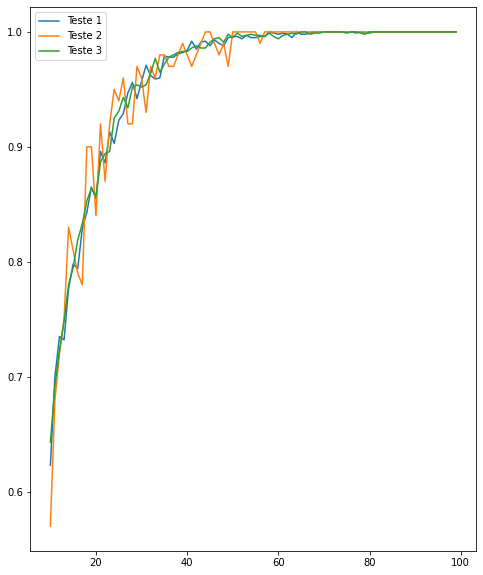

In [ ]:
# Função com parâmetros eps, n, p; que irá retornar  de tamanho n x p

# Além disso vou gerar iter uniformes de tamanho n x p.

# (iter é a quantidade de uniformes que irão ser geradas)

# A função irá retornar a média da proporção de pontos da uniforme que estão fora do hipercube [eps/2, 1-eps/2]**p

def experimento_hcube(n, p, eps, iter):

  prop_obs_outh = []

  for it in range(iter):
    vec_sim = np.random.rand(n,p)
    obs_outh = 0

    for i in range(n):
      for j in range(p):
        if vec_sim[i][j] < eps/2 or vec_sim[i][j] > 1 - eps/2: # Essa condição é boa o suficiente para o experimento ?
          obs_outh += 1
          break

    prop_obs_outh.append(obs_outh/(n))

  prop_obs_outh = np.array(prop_obs_outh)

  return np.mean(prop_obs_outh)

eixo_x = np.arange(10, 100, step = 1)
eixo_y_test1 = [experimento_hcube(10, p, 0.1, 100) for p in eixo_x]
eixo_y_test2 = [experimento_hcube(1, p, 0.1, 100) for p in eixo_x]
eixo_y_test3 = [experimento_hcube(100, p, 0.1, 10) for p in eixo_x]

plt.figure(figsize=(8,10))
plt.plot(eixo_x,eixo_y_test1, label = 'Teste 1')
plt.plot(eixo_x,eixo_y_test2, label = 'Teste 2')
plt.plot(eixo_x,eixo_y_test3, label = 'Teste 3')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Pelo experimento acima, podemos visualizar que a proporção de vetores que tem observações fora do Hipercubo interno converge para 1 a medida que aumentamos a dimensão.

Dessa forma fica clara que ao aumentarmos as dimensões, o volume do hipercubo irá se concentrar em sua borda, provando assim a afirmação do enunciado da questão : "*À medida que $p$ cresce, o volume do hipercubo $\mathbb{H}^p = [0, 1]^p$ fica cada vez mais concentrado em sua "casca" do que em seu interior.*
"

## Parte prática

### Questão P1

O objetivo dessa questão é resolver um problema de regressão linear em uma base de dados real. Mais especificamente, o objetivo é trabalhar sobre esta base aqui do Kaggle (https://www.kaggle.com/datasets/yasserh/song-popularity-dataset/), que relaciona a popularidade de uma música com certos atributos extraídos da mesma. Dessa forma, queremos ser capazes de prever se uma determinada música será ou não popular com base em determinadas informações acústicas e informações musicais.

Esse conjunto de dados consiste de $n = 18.835$ observações e um total de $p = 13$ atributos. Note que ainda não estamos em um cenário tão desfavorável de modo que tenhamos $p \approx n$. A popularidade da música, representada na coluna de nome `song_popularity`, é um número inteiro medido entre $0$ e $100$, e é tal quantidade que deve ser prevista por você com base nos $p = 13$ atributos. Porém, para este trabalho, **não** iremos usar todos os atributos, mas somente os que menciono abaixo:
* `song_duration_ms`
* `acousticness`
* `danceability`
* `energy`
* `instrumentalness`
* `liveness`
* `loudness`
* `speechiness`
* `audio_valence`

Os atributos que não usamos referem-se à tonalidade da música (`key`), se a música é estéreo ou mono (`audio_mode`) e ao compasso da música (`time_signature`). Essas informações de cunho musical **não** são menos importantes para prever a variável resposta de interesse, mas elas têm um problema que são variáveis qualitativas nominais, ou seja, **não** há uma relação de ordem entre os valores que elas assumem. Dessa forma, usá-las ingenuamente em um problema de regressão linear é uma falha teórica grave. Iremos aprender a lidar com tais tipos de variáveis mais adiante no curso, e por ora vamos manter somente as variáveis quantitativas contínuas.

Sobre a interpretação e aquisição dos atributos, todos os que estamos mantendo são bastante fáceis de serem calculados a partir de um arquivo `.mp3` contendo uma música. A interpretação deles é algo bem próximo do que o próprio nome sugere (a bruxaria está em *como* essas contas são feitas!).

Portanto, a nossa missão para esta atividade é utilizar as técnicas de regressão linear que estudamos até o momento (mínimos quadrados, lasso, Ridge, Elastic Net e talvez forward stepwise) para encontrar uma boa forma de prever a variável resposta a partir dos atributos. Para isso, siga o roteiro abaixo, e se inspire no notebook postado referente à aula do dia 13/09:
* Faça uma análise exploratória para entneder como os seus atributos se comportam, se há multicolinearidade, se algum deles é bastante correlacionado com a resposta, etc.
* Note que alguns atributos têm uma ordem de grandeza bem discrepante, o que pode ser numericamente problemático. Resolva isso de alguma forma antes de fazer a sua regressão.
* Separe o seu conjunto de dados em treinamento e teste
* Faça ajustes dos modelos de regressão que aprendemos, implementando alguma busca por validação cruzada no conjunto de treinamento para encontrar hiperparâmetros ótimos, quando for pertinente.
* Avalie o desempenho do seu modelo no conjunto de teste, e reporte os seus resultados.

In [ ]:
# Importando os Dados

data_music = pd.read_csv("song_data.csv")

# Removendo as variáveis explicativas que não iremos usar nesse projeto

data_music_1 = data_music.drop(columns=['key', 'audio_mode', 'time_signature', 'tempo', 'song_popularity', 'song_name' ])

#X = np.array(data_music_1) # -> Variáveis explicativas
X = data_music_1.copy()

y = np.array(data_music['song_popularity']) # -> Variável de resposta

data_music_1

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,audio_valence
0,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,0.474
1,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,0.370
2,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,0.324
3,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,0.198
4,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,0.574
...,...,...,...,...,...,...,...,...,...
18830,159645,0.893000,0.500,0.151,0.000065,0.1110,-16.107,0.0348,0.300
18831,205666,0.765000,0.495,0.161,0.000001,0.1050,-14.078,0.0301,0.265
18832,182211,0.847000,0.719,0.325,0.000000,0.1250,-12.222,0.0355,0.286
18833,352280,0.945000,0.488,0.326,0.015700,0.1190,-12.020,0.0328,0.323


In [ ]:
# Análise Exploratória do dados para cada um dos 9 atributos que iremos usar

data_music_1.describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,audio_valence
count,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,2.182116e+05,0.258539,0.633348,0.644995,0.078008,0.179650,-7.447435,0.102099,0.527967
std,5.988754e+04,0.288719,0.156723,0.214101,0.221591,0.143984,3.827831,0.104378,0.244632
min,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.010900,-38.768000,0.000000,0.000000
25%,1.843395e+05,0.024100,0.533000,0.510000,0.000000,0.092900,-9.044000,0.037800,0.335000
50%,2.113060e+05,0.132000,0.645000,0.674000,0.000011,0.122000,-6.555000,0.055500,0.527000
75%,2.428440e+05,0.424000,0.748000,0.815000,0.002570,0.221000,-4.908000,0.119000,0.725000
max,1.799346e+06,0.996000,0.987000,0.999000,0.997000,0.986000,1.585000,0.941000,0.984000


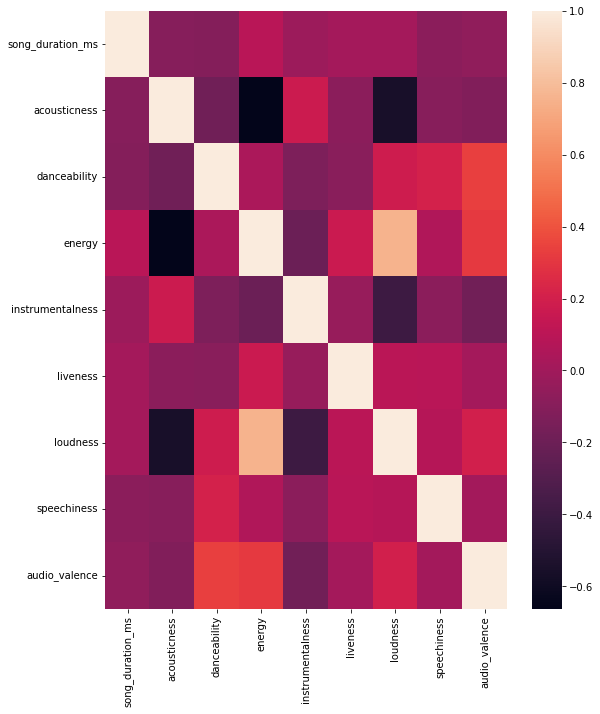

In [ ]:
# Heatmap de Correlação

plt.figure(figsize=(9,11))
heat_plot = sb.heatmap(data_music_1.corr())
plt.show()

### Separando em conjunto de Treino e conjunto de teste

In [ ]:
X_tr, X_tt, y_tr, y_tt = train_test_split(X, y, test_size = 0.3)

In [ ]:
linreg = LinearRegression()
rid = Ridge()
las = Lasso()
elanet = ElasticNet()

Iremos resolver o problema de ordem de grandeza usando a função StandardScaler para normalizar os dados. Iremos subtrair a média e dividir esse resultado pelo desvio padrão em cada um dos pontos que pertecem a $X$

Vamos usar o StandardScaler junto com os modelos de regressão, para isso iremos utilizar o pipeline que ajuda a fazer as 2 tarefas de forma silmultânea

In [ ]:
# LinearRegression

pipe_linreg = Pipeline(steps=
    [
        ('scaler', StandardScaler()),
        ('estimator', linreg)
    ]
)

# Lasso

pipe_las = Pipeline(steps=
    [
        ('scaler', StandardScaler()),
        ('estimator', las)
    ]
)

# Ridge

pipe_rid = Pipeline(steps=
    [
        ('scaler', StandardScaler()),
        ('estimator', rid)
    ]
)

# ElasticNet

pipe_elanet = Pipeline(steps=
    [
        ('scaler', StandardScaler()),
        ('estimator', elanet)
    ]
)

In [ ]:
# LinearRegression

pipe_linreg.fit(X_tr, y_tr)

# Ridge

pipe_rid.fit(X_tr, y_tr)

# Lasso

pipe_las.fit(X_tr, y_tr)

# ElasticNet

pipe_elanet.fit(X_tr, y_tr)


Pipeline(steps=[('scaler', StandardScaler()), ('estimator', ElasticNet())])

### Gráfico para comparar os coeficientes de cada um dos modelos de regressão

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performa

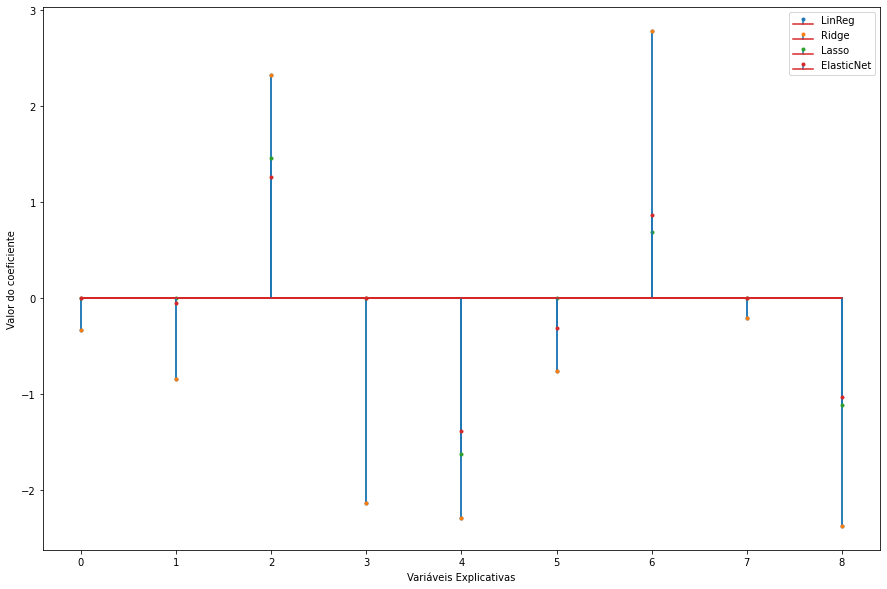

In [ ]:
# Gráfico

fig, ax = plt.subplots(figsize = (15,10))
plt.stem(pipe_linreg.named_steps['estimator'].coef_, markerfmt = '.', label = 'LinReg')
plt.stem(pipe_rid.named_steps['estimator'].coef_, markerfmt = '.', label = 'Ridge')
plt.stem(pipe_las.named_steps['estimator'].coef_, markerfmt = '.', label = 'Lasso')
plt.stem(pipe_elanet.named_steps['estimator'].coef_, markerfmt = '.', label = 'ElasticNet')
plt.xlabel('Variáveis Explicativas')
plt.ylabel('Valor do coeficiente')
plt.legend()

### Previsões usando os modelos treinados e cálculo do Erro Quadrático Médio

In [ ]:
# Linear Regression

y_tr_pred_linreg = pipe_linreg.predict(X_tr)
print('LinearRegression MSE Treino', MSE(y_tr, y_tr_pred_linreg))
y_tt_pred_linreg = pipe_linreg.predict(X_tt)
print('LinearRegression MSE Teste', MSE(y_tt, y_tt_pred_linreg))

# Ridge

y_tr_pred_rid = pipe_rid.predict(X_tr)
print('Ridge MSE Treino', MSE(y_tr, y_tr_pred_rid))
y_tt_pred_rid = pipe_rid.predict(X_tt)
print('Ridge MSE Teste', MSE(y_tt, y_tt_pred_rid))

# Lasso

y_tr_pred_las = pipe_las.predict(X_tr)
print('Lasso MSE Treino', MSE(y_tr, y_tr_pred_las))
y_tt_pred_las = pipe_las.predict(X_tt)
print('Lasso MSE Teste', MSE(y_tt, y_tt_pred_las))

# ElasticNet

y_tr_pred_elanet = pipe_elanet.predict(X_tr)
print('ElasticNet MSE Treino', MSE(y_tr, y_tr_pred_elanet))
y_tt_pred_elanet = pipe_elanet.predict(X_tt)
print('ElasticNet MSE Teste', MSE(y_tt, y_tt_pred_elanet))

LinearRegression MSE Treino 456.2142434388669
LinearRegression MSE Teste 462.8266351714246
Ridge MSE Treino 456.21424377279317
Ridge MSE Teste 462.8263893367097
Lasso MSE Treino 463.2355406270791
Lasso MSE Teste 467.5599419072321
ElasticNet MSE Treino 463.49044201665856
ElasticNet MSE Teste 467.97846678154883


## Fazendo a mesma análise para modelos que possuem Validação Cruzada

In [ ]:
rid2 = Ridge()
las2 = Lasso()
elanet2 = ElasticNet()
SS = StandardScaler()

pipe_rid2 = Pipeline(steps=[("Scaler", SS), ("Ridge", rid2)])
pipe_las2 = Pipeline(steps=[("Scaler", SS), ("Lasso", las2)])
pipe_elanet2 = Pipeline(steps=[("Scaler", SS), ("ElasticNet", elanet2)])

In [ ]:
param_grid_las = {"Lasso__alpha": [0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000]}
param_grid_rid = {"Ridge__alpha": [0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000]}

param_grid_elanet = {"ElasticNet__alpha": [0.001, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000],
                     "ElasticNet__l1_ratio": [0.001, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
# LassoCV

pipe_lasCV = GridSearchCV(pipe_las2, param_grid = param_grid_las, scoring = 'neg_mean_squared_error', cv = 5)

# RidgeCV

pipe_ridCV = GridSearchCV(pipe_rid2, param_grid = param_grid_rid, scoring = 'neg_mean_squared_error', cv = 5)

# ElasticNetCV

pipe_elanetCV = GridSearchCV(pipe_elanet2, param_grid = param_grid_elanet, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
pipe_lasCV.fit(X_tr, y_tr)
pipe_ridCV.fit(X_tr, y_tr)
pipe_elanetCV.fit(X_tr, y_tr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('ElasticNet', ElasticNet())]),
             param_grid={'ElasticNet__alpha': [0.001, 0.05, 0.01, 0.1, 0.5, 1,
                                               5, 10, 100, 1000],
                         'ElasticNet__l1_ratio': [0.001, 0.05, 0.1, 0.5, 0.7,
                                                  0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [ ]:
pd.DataFrame(pipe_lasCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027646,0.015639,0.007439,0.003879,0.001,{'Lasso__alpha': 0.001},-456.823193,-448.947399,-490.165084,-462.238782,-425.197188,-456.674329,20.991102,1
1,0.036907,0.011013,0.007792,0.004327,0.05,{'Lasso__alpha': 0.05},-457.104337,-448.725192,-490.407613,-462.051799,-425.270676,-456.711924,21.054252,3
2,0.023116,0.009238,0.006324,0.003057,0.01,{'Lasso__alpha': 0.01},-456.869155,-448.900621,-490.204511,-462.198898,-425.205701,-456.675777,21.002557,2
3,0.043043,0.019289,0.008736,0.004214,0.1,{'Lasso__alpha': 0.1},-457.410257,-448.580139,-490.727004,-461.934044,-425.415173,-456.813323,21.120346,4
4,0.044010,0.010629,0.011102,0.006653,0.5,{'Lasso__alpha': 0.5},-461.098634,-449.378376,-494.680241,-463.469199,-428.182338,-459.361758,21.629180,5
5,0.030104,0.011975,0.011451,0.004803,1,{'Lasso__alpha': 1},-465.741933,-451.810550,-499.853618,-467.507591,-432.500090,-463.482756,22.092120,6
6,0.026736,0.015067,0.008091,0.006679,5,{'Lasso__alpha': 5},-483.232107,-464.634674,-517.521778,-482.101644,-448.797076,-479.257456,22.933409,7
7,0.012465,0.000366,0.006199,0.004871,10,{'Lasso__alpha': 10},-483.232107,-464.634674,-517.521778,-482.101644,-448.797076,-479.257456,22.933409,7
8,0.029719,0.012532,0.012002,0.005329,100,{'Lasso__alpha': 100},-483.232107,-464.634674,-517.521778,-482.101644,-448.797076,-479.257456,22.933409,7
9,0.052609,0.015101,0.014095,0.007517,1000,{'Lasso__alpha': 1000},-483.232107,-464.634674,-517.521778,-482.101644,-448.797076,-479.257456,22.933409,7


In [ ]:
pd.DataFrame(pipe_ridCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026435,0.006892,0.005552,0.002860,0.001,{'Ridge__alpha': 0.001},-456.818247,-448.952761,-490.160848,-462.243366,-425.196382,-456.674321,20.989834,9
1,0.015741,0.003608,0.007125,0.004783,0.05,{'Ridge__alpha': 0.05},-456.818294,-448.952695,-490.160884,-462.243338,-425.196375,-456.674317,20.989851,7
2,0.030848,0.009270,0.011210,0.006179,0.01,{'Ridge__alpha': 0.01},-456.818255,-448.952749,-490.160854,-462.243361,-425.196381,-456.674320,20.989837,8
3,0.031357,0.010149,0.010559,0.007214,0.1,{'Ridge__alpha': 0.1},-456.818343,-448.952628,-490.160921,-462.243309,-425.196367,-456.674314,20.989868,6
4,0.018459,0.007614,0.004961,0.002116,0.5,{'Ridge__alpha': 0.5},-456.818733,-448.952091,-490.161217,-462.243080,-425.196309,-456.674286,20.990008,5
5,0.033046,0.015620,0.006320,0.003216,1,{'Ridge__alpha': 1},-456.819220,-448.951419,-490.161587,-462.242795,-425.196236,-456.674251,20.990183,4
6,0.015148,0.002872,0.004511,0.001536,5,{'Ridge__alpha': 5},-456.823123,-448.946066,-490.164553,-462.240522,-425.195662,-456.673985,20.991581,3
7,0.025684,0.015503,0.009675,0.006956,10,{'Ridge__alpha': 10},-456.828011,-448.939415,-490.168272,-462.237715,-425.194970,-456.673677,20.993323,2
8,0.026014,0.013304,0.007344,0.002490,100,{'Ridge__alpha': 100},-456.917617,-448.827106,-490.237318,-462.193084,-425.187144,-456.672454,21.023852,1
9,0.032537,0.006424,0.006774,0.003576,1000,{'Ridge__alpha': 1000},-457.899960,-448.212343,-491.059293,-462.132876,-425.420093,-456.944913,21.268240,10


In [ ]:
pd.DataFrame(pipe_elanetCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ElasticNet__alpha,param_ElasticNet__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048147,0.015920,0.007786,0.002792,0.001,0.001,"{'ElasticNet__alpha': 0.001, 'ElasticNet__l1_r...",-456.828541,-448.938699,-490.168676,-462.237411,-425.194898,-456.673645,20.993511,4
1,0.045404,0.007328,0.009436,0.000556,0.001,0.05,"{'ElasticNet__alpha': 0.001, 'ElasticNet__l1_r...",-456.828279,-448.939123,-490.168499,-462.237478,-425.195009,-456.673678,20.993393,5
2,0.058435,0.014621,0.008176,0.001093,0.001,0.1,"{'ElasticNet__alpha': 0.001, 'ElasticNet__l1_r...",-456.828011,-448.939557,-490.168320,-462.237545,-425.195123,-456.673711,20.993273,6
3,0.030504,0.005202,0.007351,0.003014,0.001,0.5,"{'ElasticNet__alpha': 0.001, 'ElasticNet__l1_r...",-456.825870,-448.943032,-490.166878,-462.238093,-425.196034,-456.673981,20.992310,8
4,0.026619,0.014422,0.009070,0.004558,0.001,0.7,"{'ElasticNet__alpha': 0.001, 'ElasticNet__l1_r...",-456.824797,-448.944777,-490.166160,-462.238367,-425.196493,-456.674119,20.991827,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.030526,0.008247,0.004849,0.002228,1000,0.7,"{'ElasticNet__alpha': 1000, 'ElasticNet__l1_ra...",-483.232107,-464.634674,-517.521778,-482.101644,-448.797076,-479.257456,22.933409,64
86,0.029010,0.006808,0.010571,0.004920,1000,0.9,"{'ElasticNet__alpha': 1000, 'ElasticNet__l1_ra...",-483.232107,-464.634674,-517.521778,-482.101644,-448.797076,-479.257456,22.933409,64
87,0.030955,0.005393,0.007008,0.002504,1000,0.95,"{'ElasticNet__alpha': 1000, 'ElasticNet__l1_ra...",-483.232107,-464.634674,-517.521778,-482.101644,-448.797076,-479.257456,22.933409,64
88,0.040127,0.016660,0.008657,0.006878,1000,0.99,"{'ElasticNet__alpha': 1000, 'ElasticNet__l1_ra...",-483.232107,-464.634674,-517.521778,-482.101644,-448.797076,-479.257456,22.933409,64


In [ ]:
print(pipe_lasCV.best_estimator_, pipe_ridCV.best_estimator_, pipe_elanetCV.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()), ('Lasso', Lasso(alpha=0.001))]) Pipeline(steps=[('Scaler', StandardScaler()), ('Ridge', Ridge(alpha=100))]) Pipeline(steps=[('Scaler', StandardScaler()),
                ('ElasticNet', ElasticNet(alpha=0.01, l1_ratio=0.001))])


In [ ]:
y_tr_pred_lasCV = pipe_lasCV.predict(X_tr)
y_tr_pred_ridCV = pipe_ridCV.predict(X_tr)
y_tr_pred_elanetCV = pipe_elanetCV.predict(X_tr)

y_tt_pred_lasCV = pipe_lasCV.predict(X_tt)
y_tt_pred_ridCV = pipe_ridCV.predict(X_tt)
y_tt_pred_elanetCV = pipe_elanetCV.predict(X_tt)


print('LassoCV treino', MSE(y_tr, y_tr_pred_lasCV))
print('LassoCV teste', MSE(y_tt, y_tt_pred_lasCV))

print('RidgeCV treino', MSE(y_tr, y_tr_pred_ridCV))
print('RidgeCV teste', MSE(y_tt, y_tt_pred_ridCV))

print('ElasticNetCV treino', MSE(y_tr, y_tr_pred_ridCV))
print('ElasticNetCV teste', MSE(y_tt, y_tt_pred_ridCV))


LassoCV treino 456.2142586436279
LassoCV teste 462.82686753937827
RidgeCV treino 456.2174236816049
RidgeCV teste 462.80434872121066
ElasticNetCV treino 456.2174236816049
ElasticNetCV teste 462.80434872121066


## Gráficos dos atributos por Popularidade

Para montar os gráficos, decidi pegar o modelo que teve o menor MSE dentre todos os modelos que criei e estimei até aqui

O modelo escolhido foi o RidgeCV

In [ ]:
def graf_rid(str_atributo, p, fig_1, fig_2):
  plt.figure(figsize=(fig_1,fig_2))
  plt.scatter(X_tt[str_atributo][:p], y_tt[:p], label = 'Dados do Cojunto de Teste' )
  plt.scatter(X_tt[str_atributo][:p], y_tt_pred_ridCV[:p], label = 'Previsões no conjunto de teste'  )
  plt.title(str_atributo)
  plt.legend()
  plt.show()

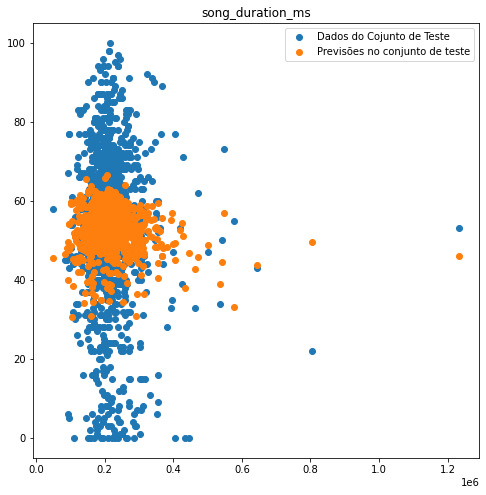

In [ ]:
graf_rid('song_duration_ms', 1000, 8, 8)

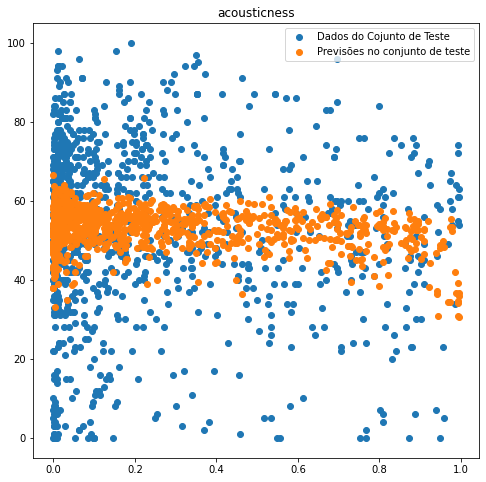

In [ ]:
graf_rid('acousticness', 1000, 8, 8)

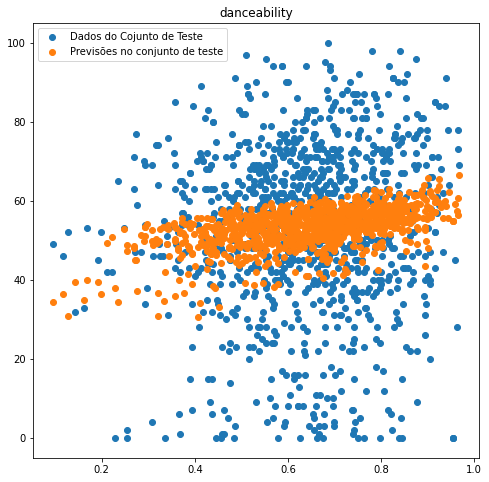

In [ ]:
graf_rid('danceability', 1000, 8, 8)

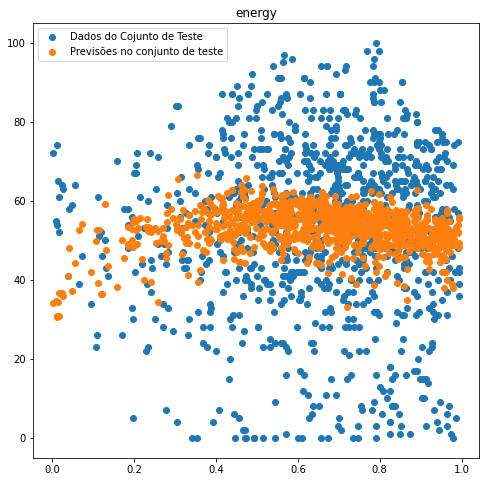

In [ ]:
graf_rid('energy', 1000, 8, 8)

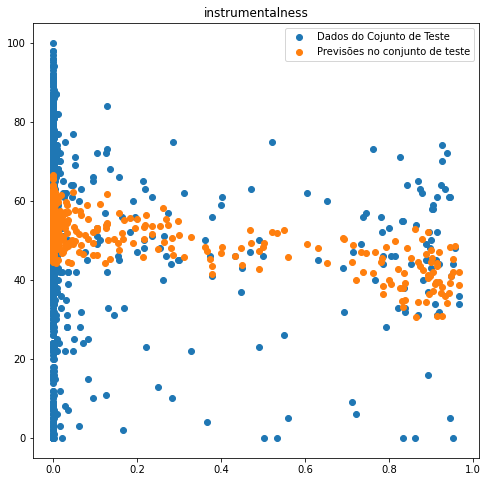

In [ ]:
graf_rid('instrumentalness', 1000, 8, 8)

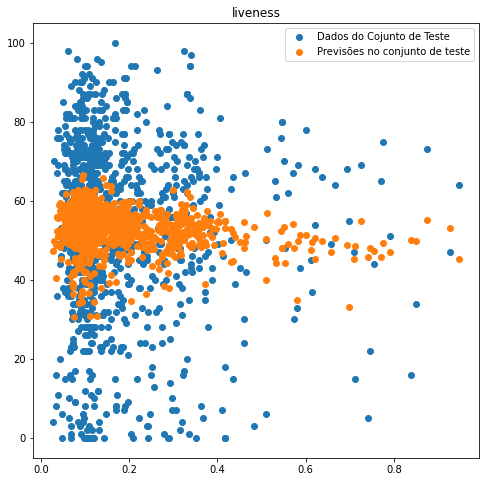

In [ ]:
graf_rid('liveness', 1000, 8, 8)

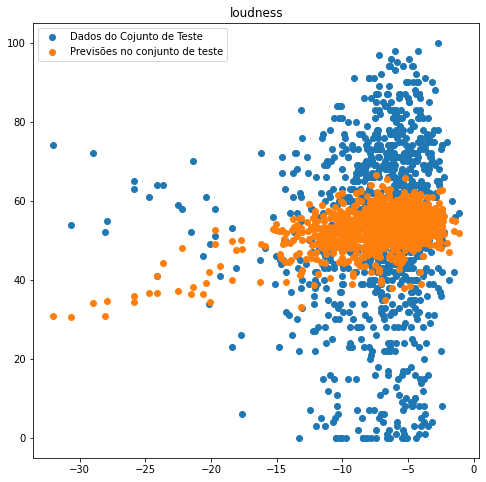

In [ ]:
graf_rid('loudness', 1000, 8, 8)

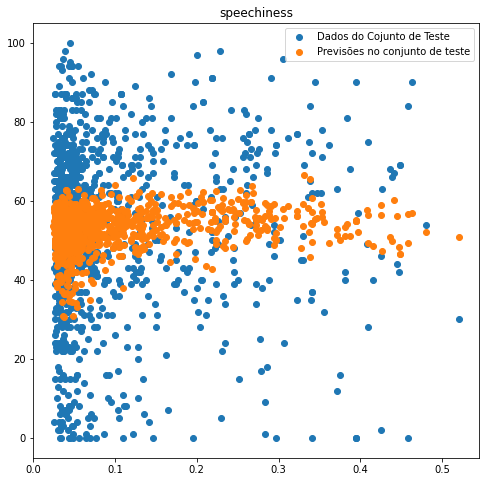

In [ ]:
graf_rid('speechiness', 1000, 8, 8)

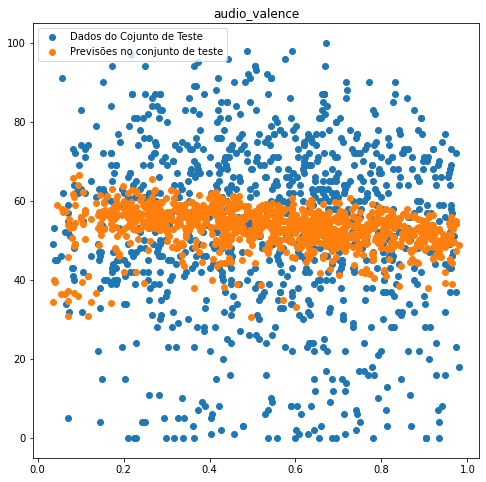

In [ ]:
graf_rid('audio_valence', 1000, 8, 8)

# Análise dos resultados encontrados nos gráficos

Os resultados dos gráficos não foram satisfatórios, pois nossas previsões no conjunto de teste se concentraram em sua maioria próximos a média do Eixo Y, por volta da faixa $ [40, 60]$ em 'song_popularity'. Não temos uma predição boa e assertiva para os pontos que estão fora desse intervalo.

Além disso, as previsões do conjunto de teste não consegue prever músicas com muita popularidade ou pouca popularidade.

<br>

## **Conclusão final**:

Testei vários modelos com e sem validação cruzada para a nossa predição, todos eles possuiam um erro quadrático médio próximos entre si.

Mesmo com o modelo que me deu o menor erro, a predição não foi boa e retornou em todas as variáveis explicativas uma predição ruim. Dessa forma, concluo que todos os modelos que não foram usados para a construção dos gráficos são tão ruins quanto ou piores.

Nossos métodos não conseguiram chegar num bom modelo de predição e por isso concluo que eles não são ideais para essa base de dados